# Machine Learning
## 1.1 Data preparation
You have been provided with datasets relating to glass. Your task is to train and assess classification models that predict the type of glass based on 9 inputs.

You must complete the following tasks:
## Task 1.1 – Data preparation (10% of total mark)
The first phase of the work requires you to load the data you have been provided with into your
selected program. Before the data can be used to train and test your models you must first
prepare it – this means that the inputs must be converted to a suitable format. There is no missing
data in the dataset.
## Task 1.2 – Classification (20% of total mark)
Having prepared the data you must now build a classification tool that can predict new points. Use
the following regression implementations within the respective program packages to construct
predictors for the dataset:

• kNN

• SVM

For each of the models, you must investigate the optimal number of neighbours and an appropriate kernel shape from linear, polynomial and radial. You must demonstrate that each classifier can provide a prediction for a given input.

Note: for the polynomial kernel, restrict your investigation to polynomials of degree 2 and 3. 

## Task 1.3 – Assessment of classification (20% of total mark)
After identifying the best model parameters in the previous task, the classification models you
have implemented must be assessed. To do this you are required to assess the accuracy for each
model.

You may use the accuracy implementation available to do this. It is not sufficient to report a
single accuracy score. You must use cross-validation to report training results and report these
values using a plot. You will also need to write a summary analysing your results and findings

# Imports 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import pandas
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

# 1.1 Data preparation

In [4]:
data = pandas.read_csv("glass_dataset.csv")
# Inputs is features, Data is the whole dataset, Targets is the labels
targets = data["Type"] # Label of the type of glass (1-7)
inputs = data.drop("Type", axis=1) # Features of the glass

In [5]:
print(data.head())  
print(data.columns)  
print(inputs.isnull().sum())  # Ensure no missing values
print("targets", targets)
print("inputs", inputs)

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')
RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64
targets 0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64
inputs           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  

# 1.2 Classifcation 

In [6]:
scaler = StandardScaler()
scaled_inputs = scaler.fit_transform(inputs)

## PCA

In [7]:
compressed = PCA(n_components=2).fit_transform(scaled_inputs) # given it has 9 features, higher dimensions might be useful

## Neighbours

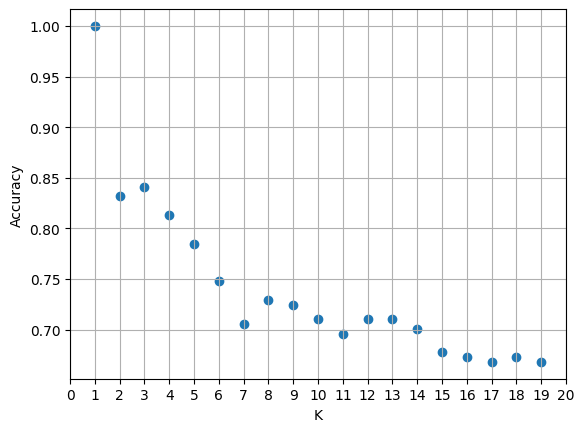

In [43]:
k_range = range (1,20)
scores = []
for k in k_range :
    knn = KNeighborsClassifier (n_neighbors = k)
    knn.fit (scaled_inputs,targets)
    scores.append (knn.score(scaled_inputs,targets))
plt.figure()
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.scatter(k_range,scores)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.grid(True)
plt.savefig ("knnloop.png", bbox_inches ="tight")
plt.show()

In [44]:
k_classifier = KNeighborsClassifier(n_neighbors=1).fit(scaled_inputs,targets)
classified_data = k_classifier.predict(scaled_inputs)

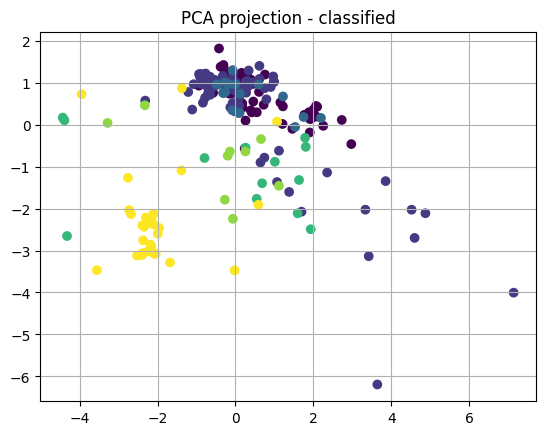

In [45]:
plt.figure()
plt.scatter(compressed [:,0], compressed [:,1], c=classified_data, cmap='viridis')
plt.title("PCA projection - classified")
plt.grid(True)
plt.savefig("glass_pca_classified.png", bbox_inches ="tight")
plt.show()


## SVM 

In [128]:
x_train,x_test,t_train,t_test = train_test_split (compressed,targets, random_state= 42)

### Kernel

In [99]:
kernel_range = ["linear", "poly", "rbf", "sigmoid"]
training_scores = []
test_scores = []
for k in kernel_range:
    if k == 'poly':
        svm_classifier = SVC(kernel="poly", degree= 2, gamma='auto').fit(x_train,t_train) 
    else:
        svm_classifier = SVC(kernel=k, gamma='auto').fit(x_train,t_train) 
    y_train = svm_classifier.predict(x_train)
    y_test = svm_classifier.predict(x_test) 
    training_scores.append(accuracy_score(t_train,y_train))
    test_scores.append(accuracy_score(t_test,y_test))

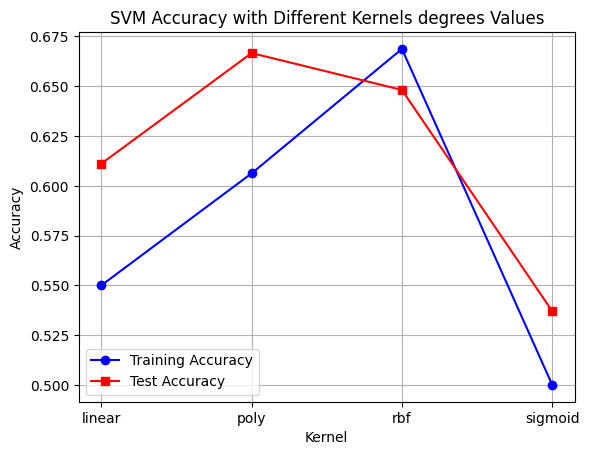

In [100]:
plt.figure()
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.plot(kernel_range, training_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(kernel_range, test_scores, marker='s', label='Test Accuracy', color='red')
plt.xticks(kernel_range)  
plt.title("SVM Accuracy with Different Kernels degrees Values")
plt.legend()
plt.grid(True)
plt.savefig("svm_kernel.png", bbox_inches="tight")
plt.show()

### Polynominal Degrees

In [101]:
degree_range = range(1,4)
training_scores = []
test_scores = []
for d in degree_range:
    svm_classifier = SVC(kernel="poly", degree= d, gamma='auto').fit(x_train,t_train) 
    y_train = svm_classifier.predict(x_train)
    y_test = svm_classifier.predict(x_test) 
    training_scores.append(accuracy_score(t_train,y_train))
    test_scores.append(accuracy_score(t_test,y_test))

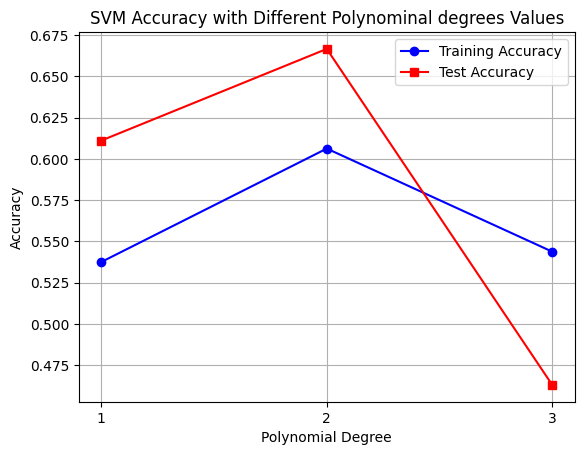

In [102]:
plt.figure()
plt.xlabel("Polynomial Degree")
plt.ylabel("Accuracy")
plt.plot(degree_range, training_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(degree_range, test_scores, marker='s', label='Test Accuracy', color='red')
plt.xticks(np.round(degree_range, 2))  
plt.title("SVM Accuracy with Different Polynominal degrees Values")
plt.legend()
plt.grid(True)
plt.savefig("svm_poly_degree.png", bbox_inches="tight")
plt.show()

### Gamma

In [103]:
gamma_range = np.linspace(0.1, 4.0,40)
training_scores = []
test_scores = []
for g in gamma_range:
    svm_classifier = SVC(kernel="poly", degree=2, gamma=g).fit(x_train,t_train) 
    y_train = svm_classifier.predict(x_train)
    y_test = svm_classifier.predict(x_test) 
    training_scores.append(accuracy_score(t_train,y_train))
    test_scores.append(accuracy_score(t_test,y_test))


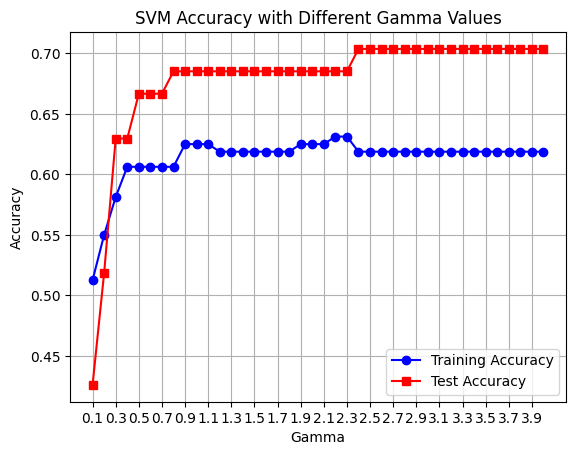

In [104]:
plt.figure()
plt.xlabel("Gamma")
plt.ylabel("Accuracy")
plt.plot(gamma_range, training_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(gamma_range, test_scores, marker='s', label='Test Accuracy', color='red')
plt.xticks(np.round(gamma_range, 2)[::2])  
plt.title("SVM Accuracy with Different Gamma Values")
plt.legend()
plt.grid(True)
plt.savefig("svm_gamma.png", bbox_inches="tight")
plt.show()

### Regularization C

In [105]:
c_range = np.linspace(0.1, 2.0,20)
training_scores = []
test_scores = []
for c in c_range:
    svm_classifier = SVC(kernel="poly", degree=2, gamma=2.5, C=c).fit(x_train,t_train) 
    y_train = svm_classifier.predict(x_train)
    y_test = svm_classifier.predict(x_test) 
    training_scores.append(accuracy_score(t_train,y_train))
    test_scores.append(accuracy_score(t_test,y_test))


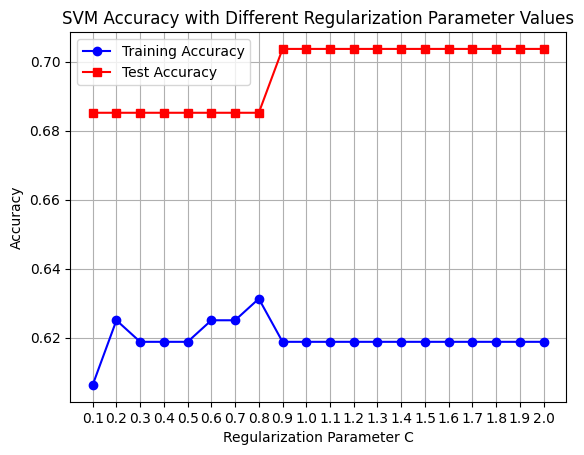

In [106]:
plt.figure()
plt.xlabel("Regularization Parameter C")
plt.ylabel("Accuracy")
plt.plot(c_range, training_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(c_range, test_scores, marker='s', label='Test Accuracy', color='red')
plt.xticks(c_range)  
plt.title("SVM Accuracy with Different Regularization Parameter Values")
plt.legend()
plt.grid(True)
plt.savefig("svm_regularization.png", bbox_inches="tight")
plt.show()

### Ceof0

In [121]:
ceof0_range = np.linspace(0.1, 3.5,20)
training_scores = []
test_scores = []
for c in ceof0_range:
    svm_classifier = SVC(kernel="poly", degree=2, gamma=2.5, C=0.9, coef0=c).fit(x_train,t_train) 
    y_train = svm_classifier.predict(x_train)
    y_test = svm_classifier.predict(x_test) 
    training_scores.append(accuracy_score(t_train,y_train))
    test_scores.append(accuracy_score(t_test,y_test))

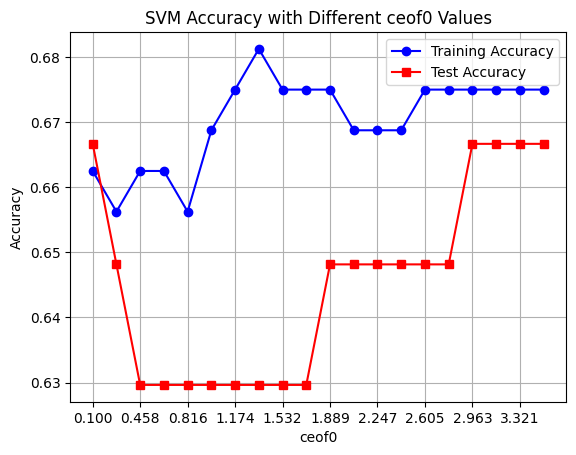

In [ ]:
plt.figure()
plt.xlabel("ceof0")
plt.ylabel("Accuracy")
plt.plot(ceof0_range, training_scores, marker='o', label='Training Accuracy', color='blue')
plt.plot(ceof0_range, test_scores, marker='s', label='Test Accuracy', color='red')
plt.xticks(ceof0_range[::2])  
plt.title("SVM Accuracy with Different ceof0 Values")
plt.legend()
plt.grid(True)
plt.savefig("svm_ceof0.png", bbox_inches="tight")
plt.show()

### Gridsearch

In [ ]:
parameters = [
    {
        'kernel': ['poly'],
        'C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 10, 100],
        'gamma': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 'scale'],
        'degree': [2, 3],
        'coef0': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 10, 100],
        'gamma': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 'scale']
    },
    {
        'kernel': ['linear'],
        'C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 10, 100]
    }
]

grid = GridSearchCV(
    SVC(), # model
    parameters, #parameters to tune
    scoring='accuracy', #evaluation metric
    cv=5, #number of cross validation
    verbose=1, #  to print the progress
    n_jobs=-1  # how many cores to use in parallel
)

grid.fit(compressed, targets)
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.4f}")

best_model = grid.best_estimator_
# {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'} is best model

Fitting 5 folds for each of 2907 candidates, totalling 14535 fits
Best parameters: {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
Best cross-validation score: 0.6261


In [ ]:
# Polynomial kernel SVM
svm_classifier_poly = SVC(kernel="poly", degree=2, gamma=2.5, C=0.9).fit(x_train, t_train) #more generalised found by me
y_train_poly = svm_classifier_poly.predict(x_train)
y_test_poly = svm_classifier_poly.predict(x_test)

# # RBF kernel SVM
svm_classifier_rbf = SVC(kernel="rbf", C=10, gamma=0.5).fit(x_train, t_train) #potentially overfitting found by gridsearch
y_train_rbf = svm_classifier_rbf.predict(x_train)
y_test_rbf = svm_classifier_rbf.predict(x_test)

# Calculate accuracy for polynomial kernel
train_accuracy_poly = accuracy_score(t_train, y_train_poly)
test_accuracy_poly = accuracy_score(t_test, y_test_poly)
print(f"Polynomial kernel: {train_accuracy_poly} training accuracy, {test_accuracy_poly} testing accuracy")

# Calculate accuracy for RBF kernel
train_accuracy_rbf = accuracy_score(t_train, y_train_rbf)
test_accuracy_rbf = accuracy_score(t_test, y_test_rbf)
print(f"RBF kernel: {train_accuracy_rbf} training accuracy, {test_accuracy_rbf} testing accuracy")

# Calculate disagreement between models
disagreement_test = np.sum(y_test_rbf != y_test_poly)
print(f"Models disagree on {disagreement_test} test samples out of {len(x_test)}")
disagreement_train = np.sum(y_train_rbf != y_train_poly)
print(f"Models disagree on {disagreement_train} training samples out of {len(x_train)}")
print(f"Percentage of disagreement on test set: {disagreement_test/len(x_test)*100:.2f}%")
print(f"Percentage of disagreement on training set: {disagreement_train/len(x_train)*100:.2f}%")

Polynomial kernel: 0.61875 training accuracy, 0.7037037037037037 testing accuracy
RBF kernel: 0.75 training accuracy, 0.6481481481481481 testing accuracy
Models disagree on 13 test samples out of 54
Models disagree on 37 training samples out of 160
Percentage of disagreement on test set: 24.07%
Percentage of disagreement on training set: 23.12%


## 1.3 Assessment of classification